# Final Project - Bike Sharing 

In this project, I will be working on data come from a company that facilitates bike-sharing, a user can rent a bike from one place and return it to another. My goal is to understand and predict daily bike rentals using linear regression.


This dataset was downloaded from University of Wisconsin, Madison.

## Import Python Libraries 

Python libraries help to extend the python programming langugae - or to help our tasks easier. 

In our project, we import **pandas** and **numpy** to load and manipulate data, **sklearn** to train model, and **seaborn** to conduct graphical analysis.

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## 1. Data Understanding

Data understanding is to gather our data from web, describe our data, and explore our data.

In [ ]:
# Load data from web

url = 'http://bit.ly/bike-data'
df_bs = pd.read_csv(url)

In [ ]:
# How many records and columns
df_bs.shape

(731, 14)

In [ ]:
# Types of each columns
df_bs.dtypes

ID                      int64
date                   object
yr                      int64
mnth                    int64
weekday                 int64
season                  int64
holiday                 int64
working_day             int64
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
casual_rentals          int64
registered_rentals      int64
dtype: object

In [ ]:
# Preview first few records in the dataset
df_bs.head(5)

,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518


In [ ]:
# Generate new data new column, helping better prediction
# Sum the 'casual_rentals' and 'registered_rentals' 
df_bs['total_rentals'] = df_bs['casual_rentals'] + df_bs['registered_rentals']

# Check new column
df_bs.head(5)


,ID,date,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
0,1,1/1/2011,0,1,6,1,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,0,1,0,1,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,0,1,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,0,1,2,1,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,0,1,3,1,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Generate Descriptive Statistics

We describe the basic features of the data in our project.

In [ ]:
# Generate descriptive stats for numeric columns in the datasets
df_bs.describe()

,ID,yr,mnth,weekday,season,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.500684,6.519836,2.997264,2.496580,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.500342,3.451913,2.004787,1.110807,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,1.000000,7.000000,3.000000,3.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,1.000000,10.000000,5.000000,3.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,1.000000,12.000000,6.000000,4.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Create pivot table -> present summary of data
bs_table = pd.pivot_table(df_bs, index=['yr', 'mnth'], values=['total_rentals'],
                          aggfunc=[np.sum, np.mean])
bs_table

sum          mean
        total_rentals total_rentals
yr mnth                            
0  1            38189   1231.903226
   2            48215   1721.964286
   3            64045   2065.967742
   4            94870   3162.333333
   5           135821   4381.322581
   6           143512   4783.733333
   7           141341   4559.387097
   8           136691   4409.387097
   9           127418   4247.266667
   10          123511   3984.225806
   11          102167   3405.566667
   12           87323   2816.870968
1  1            96744   3120.774194
   2           103137   3556.448276
   3           164875   5318.548387
   4           174224   5807.466667
   5           195865   6318.225806
   6           202830   6761.000000
   7           203607   6567.967742
   8           214503   6919.451613
   9           218573   7285.766667
   10          198841   6414.225806
   11          152664   5088.800000
   12          123713   3990.741935

In [ ]:
# missing values
df_bs.isnull().sum()

ID                    0
date                  0
yr                    0
mnth                  0
weekday               0
season                0
holiday               0
working_day           0
temp                  0
atemp                 0
hum                   0
windspeed             0
casual_rentals        0
registered_rentals    0
total_rentals         0
dtype: int64

### Explore our data

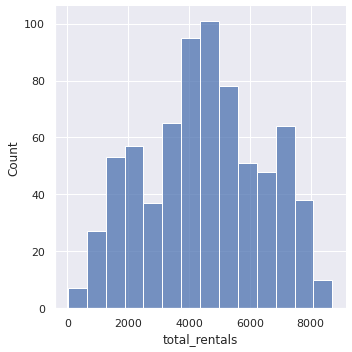

In [ ]:
# Generate histogram
sns.displot(df_bs, x='total_rentals');

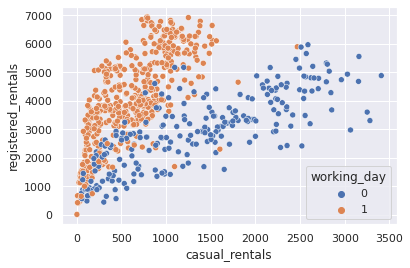

In [ ]:
# scatter plot
# Working_day : 1 -> Monday to Friday / 0 -> weekend Saturday or Sunday
sns.scatterplot(x='casual_rentals', y='registered_rentals', hue='working_day', data=df_bs);

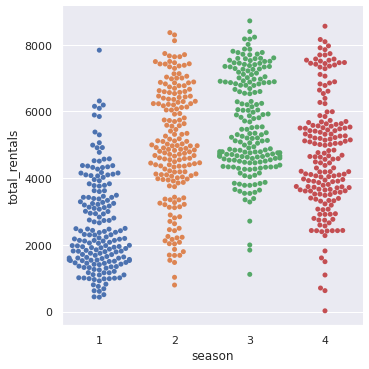

In [ ]:
# Swarmplot
# df_bs['season'] = df_bs['season'].replace([1, 2, 3, 4],
#                                                ['Winter', 'Spring', 'Summer', 'Fall'])
sns.catplot(x='season', y='total_rentals', kind='swarm', data=df_bs);

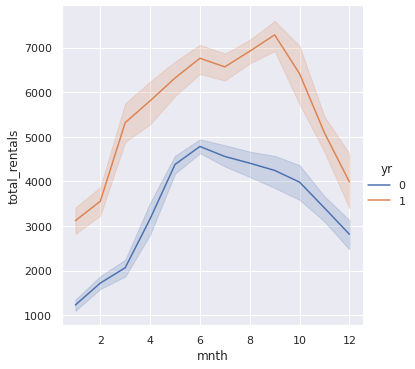

In [ ]:
# Lineplot
sns.relplot(x='mnth', y='total_rentals', hue='yr', kind='line', data=df_bs);

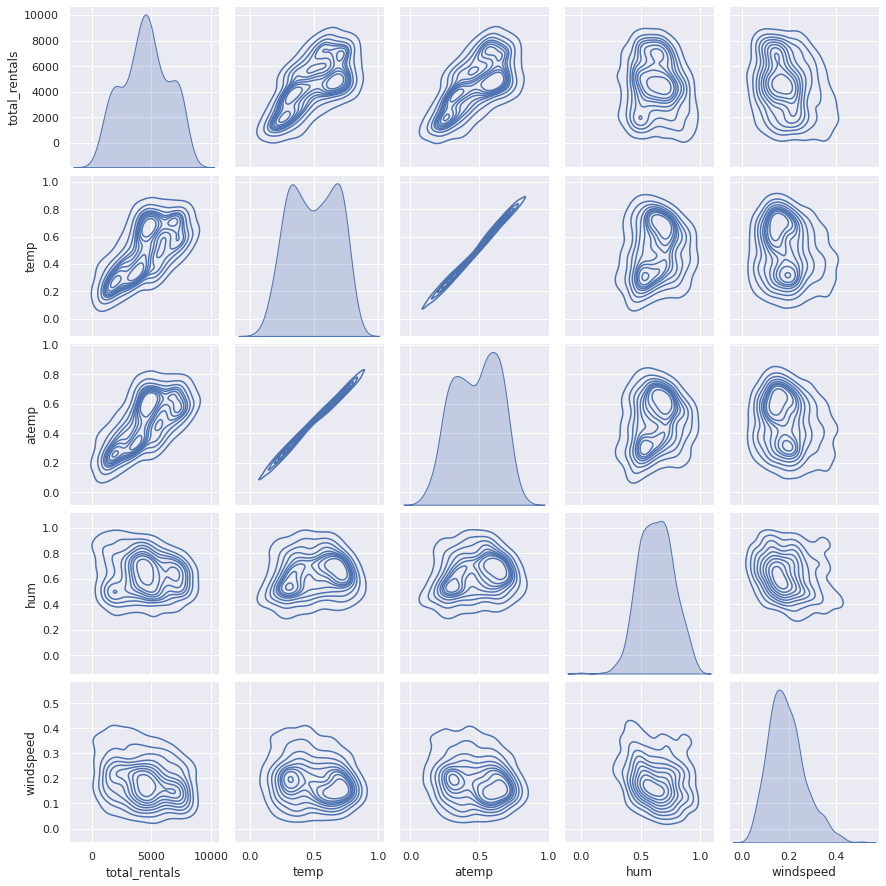

In [ ]:
# Pairplot
sns.pairplot(df_bs, vars=['total_rentals', 'temp', 'atemp', 'hum', 'windspeed'], kind='kde');

# Data Preparation

First, we know there is no missing data in our dataset, which means our data is really complete and helps us save plenty of times !!!!!


Second, we determine which features will be used in our model and which features will not be used in our model.

In [ ]:
# One-Hot encoding
df_bs = pd.get_dummies(df_bs, columns=['season'])
df_bs.head(5)

,ID,date,yr,mnth,weekday,holiday,working_day,temp,atemp,hum,windspeed,casual_rentals,registered_rentals,total_rentals,season_1,season_2,season_3,season_4
0,1,1/1/2011,0,1,6,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0,0,0
1,2,1/2/2011,0,1,0,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,0,0
2,3,1/3/2011,0,1,1,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,0
3,4,1/4/2011,0,1,2,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,0
4,5,1/5/2011,0,1,3,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,0


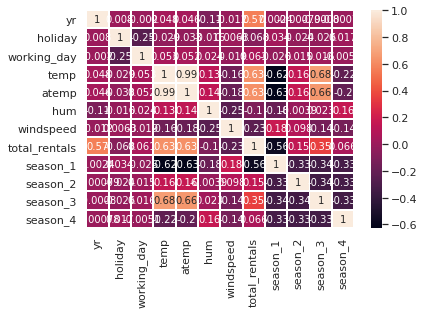

In [ ]:
# Heatmap

# Generate a new dataframe with valued column 
# bs_new = pd.DataFrame(df_bs, columns=['temp', 'atemp', 'hum', 'windspeed', 'season_1', 'season_2', 'season_3', 'season_4', 'total_rentals'])
bs_new = df_bs.drop(columns=['ID', 'casual_rentals', 'registered_rentals', 'mnth', 'weekday'])
# Generate heatmap
sns.heatmap(bs_new.corr(), linewidths=.9, annot=True);


In [ ]:
# Preparation dependent variable(y) and independent variable(X) / >0.5 or <-0.5
X = df_bs[['temp', 'season_1', 'yr']]
y = df_bs['total_rentals']

## 2. Modeling

We split our data sets, select linear regression as our model techniques, and get ready for training!

In [ ]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# Training
model = LinearRegression()
classifier = model.fit(X_train, y_train)

In [ ]:
# Identify coefficient and intercepts
print(classifier.coef_)
print(classifier.intercept_)

[ 4491.85668833 -1255.96306824  2052.99528178]
1575.312212106608


In [ ]:
# Predict 
# new_X = [[0.30]]
# classifier.predict(new_X)

In [ ]:
# Testing
y_pred = classifier.predict(X_test)

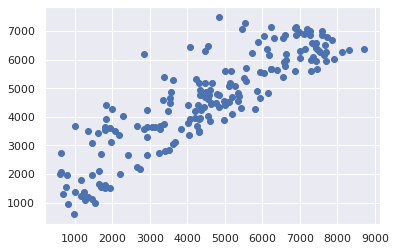

In [ ]:
plt.scatter(y_test, y_pred);

In [ ]:
# R squared
metrics.r2_score(y_test, y_pred)

0.7535292582341668

# Conclusion

1. Registered bike sharing is more common on weekdays than holidays or weekends. If we got time data, we could predict which time would have the highest rental.
2. The number of rentals increases when the tempreature rises.
3. Bike sharing is more famous in summer, fall, and spring and it is the least famous in winter.
4. The number of total rentals increases from frist year to second year and Septemper gets the highest YoY%.
5. Our R squared is around 75%, which means 75% of data fit the our linear regression model.

This is my exploratory data analysis on Bike Sharing and the analysisi will keep going on. Any comments and feedback are welcomes.